<a href="https://colab.research.google.com/github/MeghanaKankanala/TSF/blob/main/Iris_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
iris_frame=pd.read_csv("Iris.csv")
iris_frame.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Grouping into x & y sets

In [9]:
x=iris_frame.drop(columns=["Species","Id"] ,axis=1)
y=iris_frame.Species
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
y=encode.fit_transform(y)
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Let's see how kmeans clustering works:

kmeans itself means that 'k' no of centriods .The steps to implement are :

step1:  Initially take some k no of centroids

step2:  Initialize them 

step3:  Create clusters by grouping all the nearest points to these centroids respectively

step4:  Now get the mean of the each cluster created and update the centroids to the mean values till  no future movement of centroids possible.

step5:  To get the optimized/best value of k perform elbow method, where the plot is between wcss(within cluster sum of squares) and k value . From this plot, the k value where the abrupt decrease / elbow shape starts that is taken as optimum value of k. 


In [4]:
from sklearn.cluster import KMeans
wcss_scores=[]
for i in range(1,10):
  model=KMeans(n_clusters=i,random_state=1)
  model.fit(x)
  wcss_scores.append(model.inertia_)

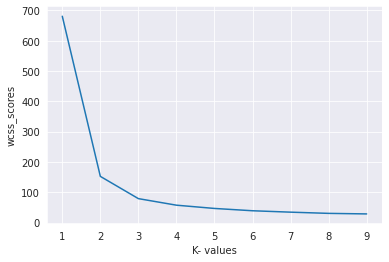

In [5]:
sns.set_style("darkgrid")
plt.plot(range(1,10),wcss_scores)
plt.xlabel("K- values")
plt.ylabel("wcss_scores")
plt.show()



clearly we can see the elbow curve start at k=3 and therefore optimum number of k is 3

In [6]:
model=KMeans(n_clusters=3,random_state=1)
model.fit_predict(x)



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)